# Write a program to execute speech preprocessing
•	Identify sampling frequency
•	Identify bit resolution
•	Make sampling frequency fs = 8000 then save the signal.


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display

# Example usage:
file_path = "/content/drive/MyDrive/Digital Image-Signal Processing/harvard.wav"

def plot_waveform_and_spectrogram(signal, sr, title):
    # Plot the waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    plt.title('Waveform of the speech signal - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

# Load the audio file with Librosa
signal, sr = librosa.load(file_path, sr=None)

# Identify sampling frequency and bit resolution
print('Original Sampling Frequency:', sr)
print('Original Bit Resolution:', signal.dtype)

# Plot waveform and spectrogram of the original signal
plot_waveform_and_spectrogram(signal, sr, 'Original')

# Play the original signal
display(Audio(signal, rate=sr))

# Set sampling frequency to 8000 Hz
sr_8000 = 8000
signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=sr_8000)

# Identify sampling frequency and bit resolution of the resampled signal
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled.dtype)

# Save the resampled signal
wavfile.write('speech_signal_8000Hz.wav', sr_8000, (signal_resampled * 32767).astype(np.int16))

# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')

# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))


Output hidden; open in https://colab.research.google.com to view.

Resampled Sampling Frequency: 8000
Resampled Bit Resolution: int16


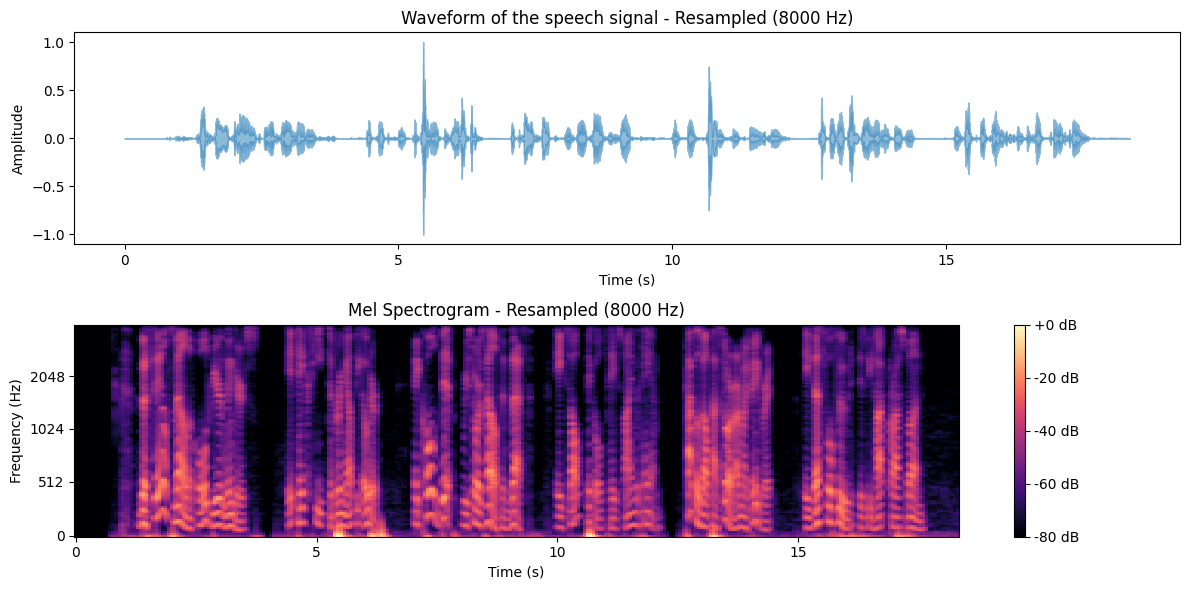

In [ ]:
# Reduce bit resolution to 16 bits
signal_resampled_16bit = (signal_resampled * 32767).astype(np.int16)

# Identify sampling frequency and bit resolution of the resampled signal
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled_16bit.dtype)

# Save the resampled signal with reduced bit resolution
wavfile.write('speech_signal_8000Hz_16bit.wav', sr_8000, signal_resampled_16bit)

# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')

# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))

# Write a program to display the region of a speech signal.
•	Voice region.
•	Un-voice region.
•	Silence region.


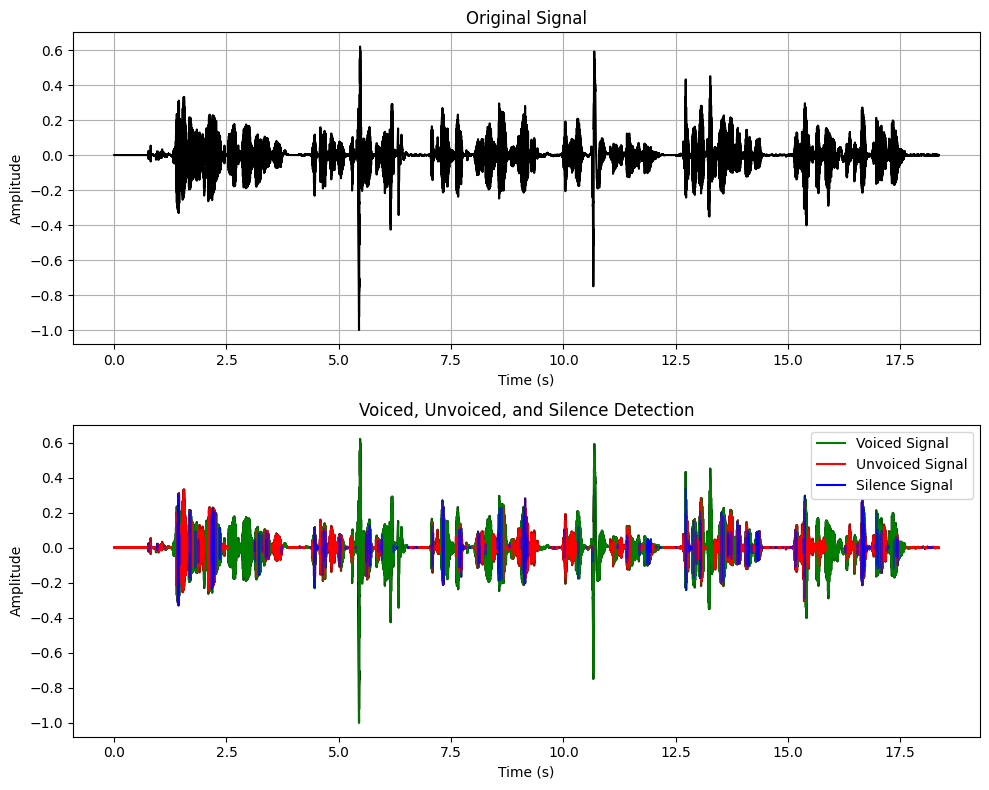

ValueError: x and y must have same first dimension, but have shapes (809508,) and (1,)

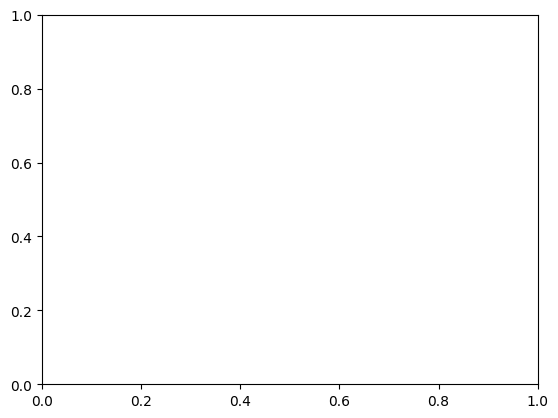

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Read the audio file
y, fs = librosa.load('/content/drive/MyDrive/Digital Image-Signal Processing/harvard.wav', sr=None)

# Define frame size and overlap (in samples)

frame_size = 256
overlap = 128

# Calculate number of frames
num_frames = (len(y) - frame_size) // (frame_size - overlap) + 1

# Initialize variables
voiced_frames = []
unvoiced_frames = []
silence_frames = []

# Iterate through each frame
for i in range(num_frames):
    # Extract current frame
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    frame = y[start_idx:end_idx]

    # Calculate energy of the frame
    energy = np.sum(np.abs(frame)**2)

    # Calculate zero-crossing rate (ZCR)
    zcr = np.sum(np.diff(np.sign(frame)) != 0)

    # Thresholds for voiced, unvoiced, and silence detection
    voiced_threshold = 0.01 * np.max(energy)  # adjust threshold based on your audio
    unvoiced_threshold = 0.001 * np.max(energy)  # adjust threshold based on your audio
    silence_threshold = 0.0001 * np.max(energy)  # adjust threshold based on your audio


    # Identify frame type based on energy and ZCR
    # if energy > voiced_threshold and zcr > 10:  # adjust values for voiced detection
    #     voiced_frames.append(i)
    # elif energy > unvoiced_threshold and zcr < 10:  # adjust values for unvoiced detection
    #     unvoiced_frames.append(i)
    # else:
    #     silence_frames.append(i)
    if energy > voiced_threshold and zcr < 10:  # adjust values for voiced detection
        voiced_frames.append(i)
    elif energy > unvoiced_threshold and zcr > 10:  # adjust values for unvoiced detection
        unvoiced_frames.append(i)
    else:
        silence_frames.append(i)

# Calculate time axis for plotting
time_axis = np.arange(len(y)) / fs

# Plot the original signal and the segmented parts
plt.figure(figsize=(10, 8))

# Original Signal
plt.subplot(2, 1, 1)
plt.plot(time_axis, y, 'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.grid(True)

# Voiced, Unvoiced, and Silence Detection
plt.subplot(2, 1, 2)
plt.plot(time_axis, y, 'k')

# Plot voiced segments
for i in voiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'g', alpha=0.5)

# Plot unvoiced segments
for i in unvoiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'r', alpha=0.5)

# Plot silence segments
for i in silence_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'b', alpha=0.5)

# Create custom legend entries
legend_elements = [
    Line2D([0], [0], color='g', label='Voiced Signal'),
    Line2D([0], [0], color='r', label='Unvoiced Signal'),
    Line2D([0], [0], color='b', label='Silence Signal')
]

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Voiced, Unvoiced, and Silence Detection')
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


# Write a program to compute zero crossing rate (ZCR) using different window function of a speech signal.

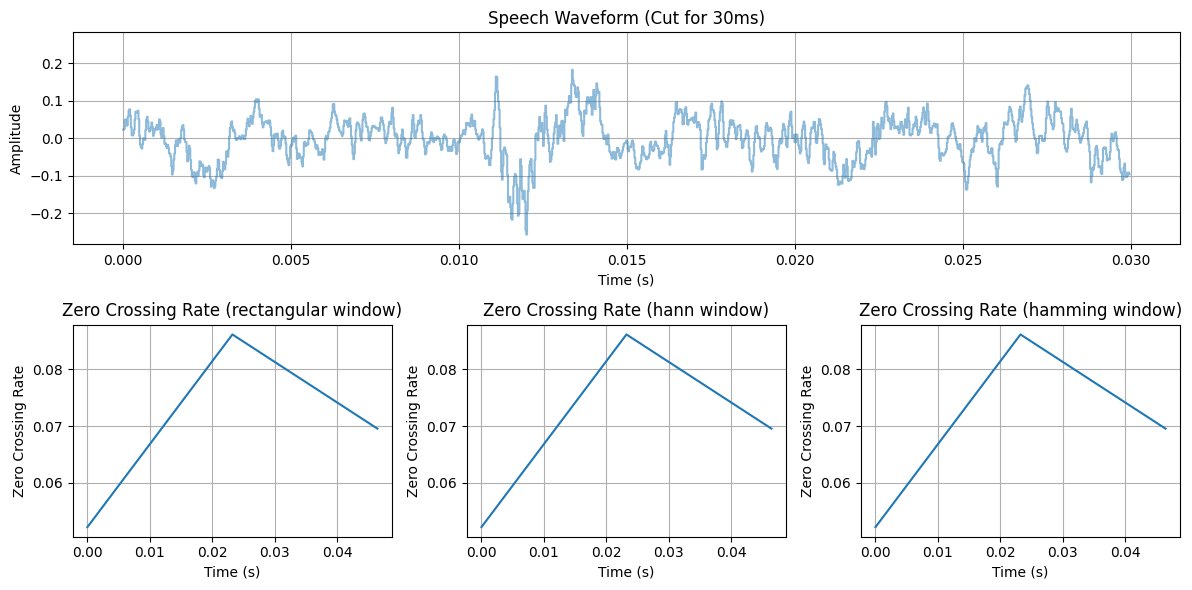

In [15]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Load the audio file
audio_file = "/content/drive/MyDrive/Digital Image-Signal Processing/jackhammer.wav"
signal, sr = librosa.load(audio_file, sr=None)

# Play the audio
display(Audio(signal, rate=sr))

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(sr * 2.5):int(sr * 2.53)]

# Parameters
frame_length = int(sr * 0.03)  # 30 ms frame length
hop_length = 512

# Compute zero-crossing rate (ZCR) for the cut portion with different window functions
window_functions = ['rectangular', 'hann', 'hamming']

plt.figure(figsize=(12, 6))

# Plot speech waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(cut_signal, sr=sr, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Waveform (Cut for 30ms)')
plt.grid(True)

for i, window_function in enumerate(window_functions, start=1):
    # Compute window function
    if window_function == 'rectangular':
        window = np.ones(frame_length)
    else:
        window = librosa.filters.get_window(window_function, frame_length, fftbins=True)

    # Truncate window to match the length of the signal
    window = window[:len(cut_signal)]

    # Apply window to the signal
    signal_windowed = cut_signal * window

    # Compute zero-crossing rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=signal_windowed, frame_length=frame_length, hop_length=hop_length)

    # Plot zero crossing rate
    plt.subplot(2, len(window_functions), len(window_functions) + i)
    plt.plot(librosa.frames_to_time(range(len(zcr[0])), hop_length=hop_length), zcr[0])
    plt.xlabel('Time (s)')
    plt.ylabel('Zero Crossing Rate')
    plt.title(f'Zero Crossing Rate ({window_function} window)')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Write a program to compute short term auto-correlation of a speech signal.

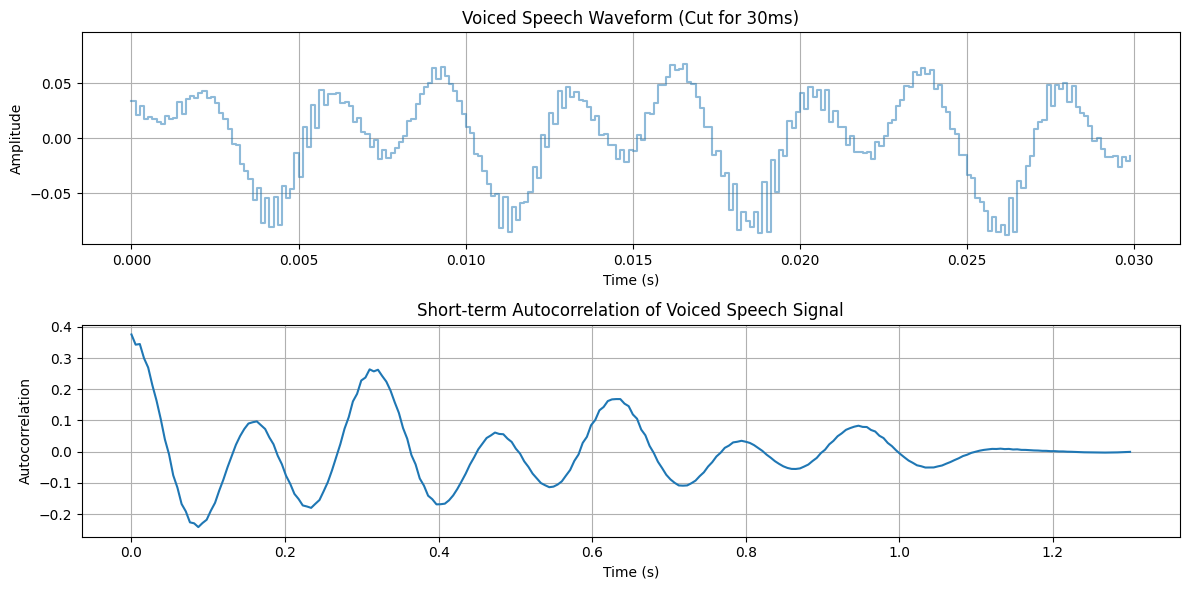

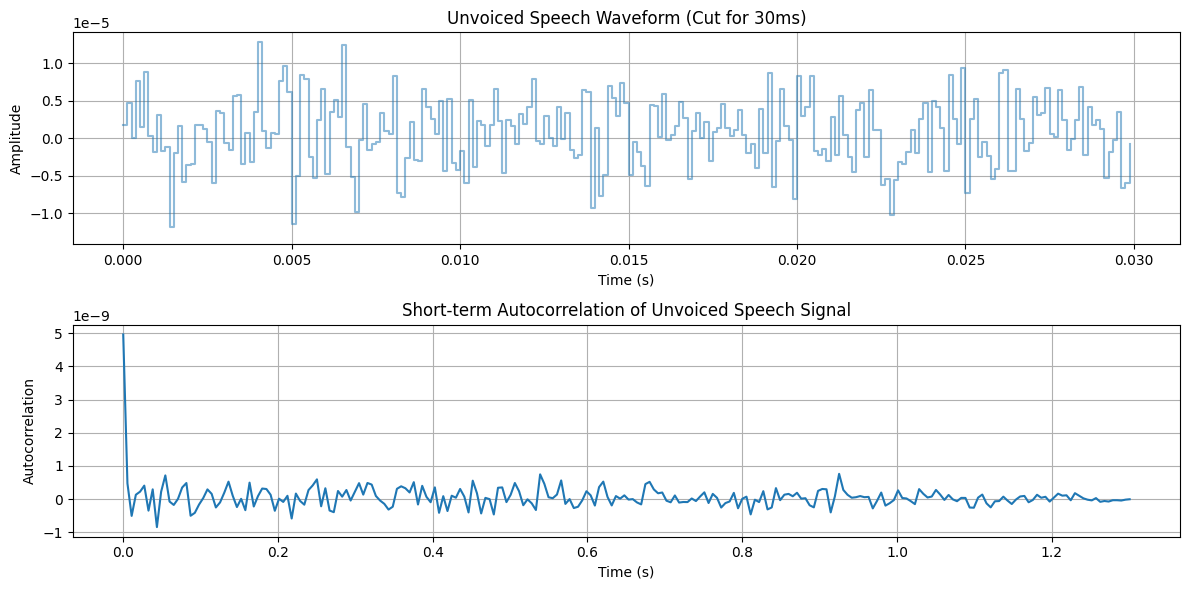

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, type):

    # Compute short-term autocorrelation
    auto_corr = librosa.autocorrelate(y=cut_signal, max_size=frame_length)

    # Plot speech waveform and autocorrelation
    plt.figure(figsize=(12, 6))

    # Plot speech waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(cut_signal, sr=sr, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(type +' Speech Waveform (Cut for 30ms)')
    plt.grid(True)

    # Plot autocorrelation
    plt.subplot(2, 1, 2)
    plt.plot(librosa.frames_to_time(range(len(auto_corr)), hop_length=hop_length), auto_corr)
    plt.xlabel('Time (s)')
    plt.ylabel('Autocorrelation')
    plt.title('Short-term Autocorrelation of ' + type + ' Speech Signal')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Usage example
audio_file = "/content/drive/MyDrive/Digital Image-Signal Processing/harvard.wav"
# Load the audio file
signal, sr = librosa.load(audio_file, sr=8000)
#    Parameters
frame_duration = 0.03  # 30 ms frame duration
hop_duration = frame_duration / 2  # Half of frame duration for 50% overlap

# Convert durations to samples
frame_length = int(sr * frame_duration)
hop_length = int(sr * hop_duration)

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(5*sr) : int(5.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Voiced')

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(4*sr) : int(4.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Unvoiced')


# Write a program to estimate pitch information of a speech signal

8000
Pitch Period (To): 0.021750000000000002
Pitch Frequency (Fo): 45.97701149425287


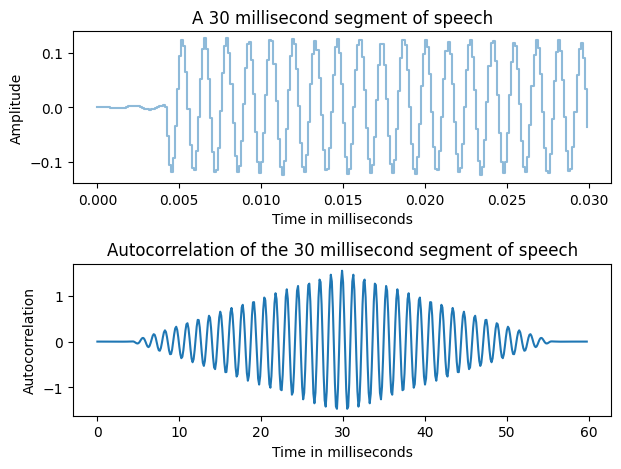

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Read the speech segment from the WAV file using Librosa
y, Fs = librosa.load('/content/drive/MyDrive/Digital Image-Signal Processing/Pitch_Estimation.wav', sr=8000)
print(Fs)
# Cut a portion of the speech signal (for example, for 30 ms)
start_time = 4.515
end_time = 4.5457
y = y[int(start_time * Fs):int(end_time * Fs)]

# Compute autocorrelation
autocorrelation = np.correlate(y, y, mode='full')

# Time axis for autocorrelation plot (in milliseconds)
kk = np.arange(0, len(autocorrelation)) / Fs * 1000

# Plot original signal
plt.subplot(2, 1, 1)
# plt.plot(np.arange(len(y)) / Fs * 1000, y)
librosa.display.waveshow(y, sr=Fs, alpha=0.5)
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('A 30 millisecond segment of speech')

# Plot autocorrelation
plt.subplot(2, 1, 2)
plt.plot(kk, autocorrelation)
plt.xlabel('Time in milliseconds')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the 30 millisecond segment of speech')

# Extract relevant part of autocorrelation (21 to 160)
auto = autocorrelation[20:160]

# Find the maximum value and corresponding sample number
max_idx = np.argmax(auto)
sample_no = max_idx + 21  # Adjust for the indexing
pitch_period_To = (20 + sample_no) * (1 / Fs)
pitch_freq_Fo = 1 / pitch_period_To

print("Pitch Period (To):", pitch_period_To)
print("Pitch Frequency (Fo):", pitch_freq_Fo)

plt.tight_layout()
plt.show()
